# Using Unsupervised Machine Learning on Chocolate Bar Ratings

## Index
### 0.1 Import Libraries
### 0.2 Import Data
### 0.3 The Elbow Technique
### 0.4 K-means Clustering

## 0.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

## 0.2 Import Data

In [3]:
# create shortcut path to project folder
path = r'C:\Users\chris\OneDrive\Documents\2-7-2024 Final Project'

In [4]:
# import 'flavor_cacao_clean' as dataframe
df_cacao = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','chocolate_bar_ratings_clean.csv'), index_col = 0)

In [5]:
# verify new data frame
df_cacao.head()

company company_location  review_date country_of_bean_origin  \
0    5150           U.S.A.         2019               Tanzania   
1    5150           U.S.A.         2019             Madagascar   
2    5150           U.S.A.         2019     Dominican Republic   
3    5150           U.S.A.         2021                   Fiji   
4    5150           U.S.A.         2021                  India   

  specific_bean_or_bar_origin  cocoa_percent ingredients  \
0       Kokoa Kamili, batch 1           0.76    3- B,S,C   
1      Bejofo Estate, batch 1           0.76    3- B,S,C   
2             Zorzal, batch 1           0.76    3- B,S,C   
3       Matasawalevu, batch 1           0.68    3- B,S,C   
4           Anamalai, batch 1           0.68    3- B,S,C   

  most_memorable_characteristics  rating  
0      rich cocoa, fatty, bready    3.25  
1   cocoa, blackberry, full body    3.75  
2         cocoa, vegetal, savory    3.50  
3            chewy, off, rubbery    3.00  
4  milk brownie, macadamia,chewy    3.50

In [6]:
# verify shape of data frame
df_cacao.shape

(2588, 9)

## 0.3 Using Elbow Technique

In [7]:
# Create subset data frame for k cluster analysis
df_clust = df_cacao[['cocoa_percent','rating']]

In [8]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [9]:
score = [kmeans[i].fit(df_clust).score(df_clust) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-518.1968574864752,
 -181.8132322375598,
 -101.21433080759508,
 -66.0317167891028,
 -43.03042881829022,
 -27.33395840375141,
 -18.69657468270194,
 -13.471848855615663,
 -9.44205928018872]

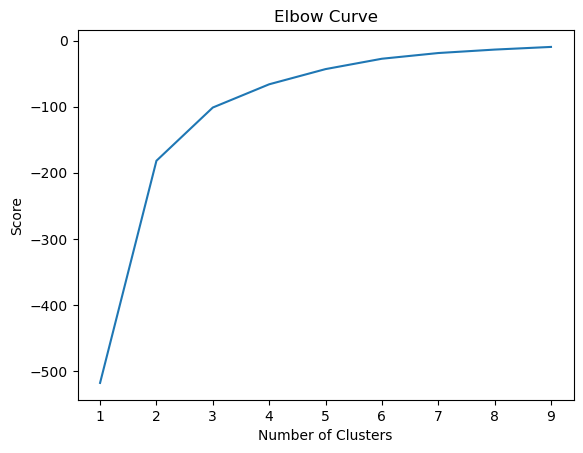

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Explanation
The above showcases that there are about 5 points where the line diverges. The first major change occurs around the second cluster, followed by another lesser change around the third cluster. The other changes are less noticeable, which tells us that we should use 3 clusters for our k-means cluster analysis.

## 0.4 K-means Clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df_clust)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [13]:
df_clust['clusters'] = kmeans.fit_predict(df_clust)

C:\Users\chris\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chris\AppData\Local\Temp\ipykernel_15536\666739472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['clusters'] = kmeans.fit_predict(df_clust)


In [14]:
df_clust['clusters'].value_counts()

clusters
0    1008
1    1005
2     575
Name: count, dtype: int64

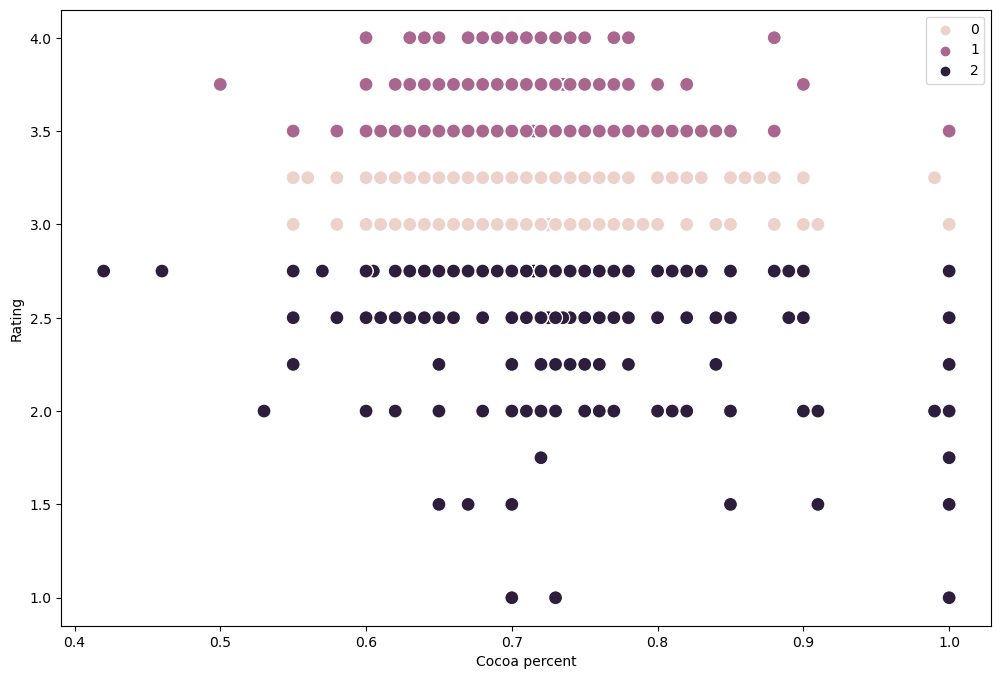

In [15]:
# Plot the clusters for the 'cocoa_percent' and 'rating' variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_clust['cocoa_percent'], y=df_clust['rating'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Cocoa percent') # Label x-axis.
plt.ylabel('Rating') # Label y-axis.
plt.show()

### Explantion
The above visual indicates that there are three clusters in the data that can be noticed based on rating. The first cluster has data points for chocolate bar ratings between 1 and 2.75 with a cocoa percent range between 40 and 100 percent. The second cluster has a rating between 3 to 3.25 with a cocoa percent with a range between 55 and 1 percent. The third cluster has a rating between 3.5 and 5 with a cocoa percent range between 50 and 100 percent. The results from this visual is very similar to the ones from the category plot and reinforces the notion that theres no significant correlation between a chocolate bars rating and its cocoa_percent.

In [16]:
df_clust.loc[df_clust['clusters'] == 2, 'cluster'] = 'dark purple'
df_clust.loc[df_clust['clusters'] == 1, 'cluster'] = 'purple'
df_clust.loc[df_clust['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\chris\AppData\Local\Temp\ipykernel_15536\3348496975.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust.loc[df_clust['clusters'] == 2, 'cluster'] = 'dark purple'


In [17]:
df_clust.groupby('cluster').agg({'cocoa_percent':['mean', 'median'], 
                         'rating':['mean', 'median']})

cocoa_percent           rating       
                     mean median      mean median
cluster                                          
dark purple      0.725957   0.71  2.579565   2.75
pink             0.715645   0.70  3.117560   3.00
purple           0.710995   0.70  3.633333   3.50

### Final Thoughs

The summary statistics of the cluster analysis shows that each cluster has a similar mean and median for "cocoa_percent" with differences between .01 and .03, while the mean and median are slightly more different for "rating" with differences between 0.12 and 0.18  . These results dont offer any new insight and might not be used in the final project presentation.